## Aim: To get familiar with OpenCV operations
### Note: Use matplotlib or OpenCV to display images and write the code after the #Answer comment
### Grade points = 20%
### Please submit the notebook as the submission and make sure output for each cell is displayed and all cells are executed

## Important Note: Please submit your original work and don't share your work with others

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image


### Question 1

In [2]:
#read image opencv-logo
opencv_logo = cv2.imread('opencv-logo.png')

#display shape and size of the image
print("Shape of the image (Height, Width, Channels):", opencv_logo.shape)
print("Size of the image (Total number of pixels):", opencv_logo.size)



Shape of the image (Height, Width, Channels): (739, 600, 3)
Size of the image (Total number of pixels): 1330200


### Question 2

(-0.5, 199.5, 149.5, -0.5)

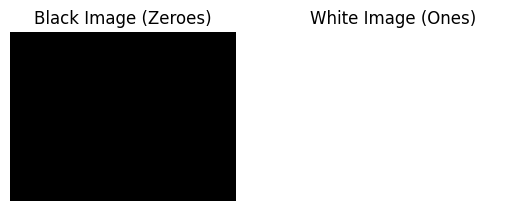

In [3]:
#create a numpy array of zeroes that is 150 pixels tall, 200 pixels wide
zeroes = np.zeros((150, 200), dtype=np.uint8)
#display this black image
plt.subplot(1, 2, 1)
plt.imshow(zeroes, cmap='gray')
plt.title('Black Image (Zeroes)')
plt.axis('off')  

#Similarly create a numpy array on ones with above dimensions and display the white image
ones = np.ones((150, 200), dtype=np.uint8) * 255  
plt.subplot(1, 2, 2)
plt.imshow(ones, cmap='gray_r')
plt.title('White Image (Ones)')
plt.axis('off')  



### Question 3

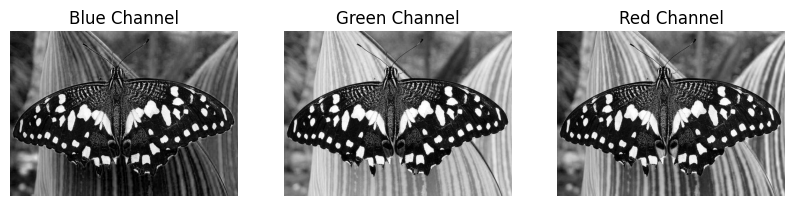

In [4]:
#read the butterfly image and display the r,g,b channels of the image
butterfly_img = cv2.imread('butterfly.jpg', cv2.IMREAD_COLOR)
blue_channel, green_channel, red_channel = cv2.split(butterfly_img)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(blue_channel, cmap='gray')
plt.title('Blue Channel')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(green_channel, cmap='gray')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(red_channel, cmap='gray')
plt.title('Red Channel')
plt.axis('off')

#Then display the butterfly image in the HSV color space

plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(butterfly_img, cv2.COLOR_BGR2HSV))
plt.title('Butterfly Image in HSV')
plt.axis('off')
plt.show()



### Question 4

[[10 10 10 10 10]
 [10 10 10 10 10]
 [10 10 10 10 10]
 [10 10 10 10 10]
 [10 10 10 10 10]]

[[0.54579059 0.68480848 0.01912486]
 [0.63981199 0.25564196 0.11484316]
 [0.1501487  0.84326673 0.25475414]]

Largest value: 0.8432667272793307
Smallest value: 0.019124864331864



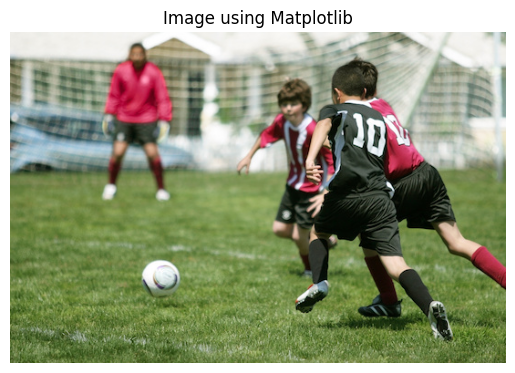

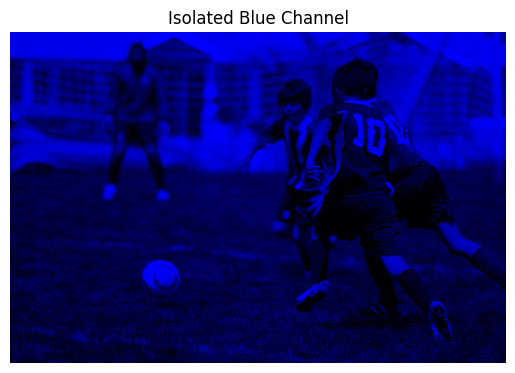

In [5]:
#create a 5 by 5 array where every number is a 10


my_arr = np.ones((5, 5), dtype=int) * 10

print(my_arr)
print()

#run the cell below to create an array of random numbers and see if you can figure out how it works.
random_array = np.random.rand(3, 3)
print(random_array)
print()

#what are the largest and smalled values in this array?
print("Largest value:", np.max(random_array))
print("Smallest value:", np.min(random_array))
print()


#use PIL and matplotlib to read and display the any image of your choice from the given images.
image = Image.open('players.jpg')
plt.imshow(image)
plt.title('Image using Matplotlib')
plt.axis('off')  
plt.show()

#convert the image to a NumPy Array
image_array = np.array(image)

#use slicing to set the RED and GREEN channels of the picture to 0, then use imshow() to show the isolated blue channel
image_array[:, :, 0] = 0  # Red channel
image_array[:, :, 1] = 0  # Green channel

plt.imshow(image_array)  
plt.title('Isolated Blue Channel')
plt.axis('off')  # 
plt.show()

### Question 5

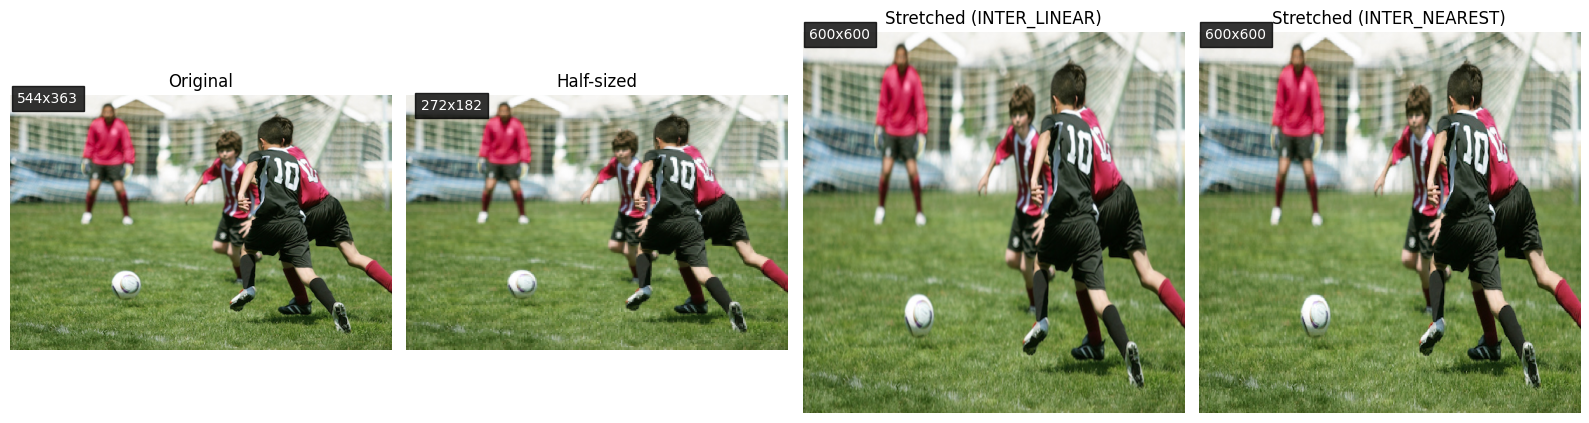

In [6]:
#read in the players image
image_path = 'players.jpg'
player_img = cv2.imread(image_path, cv2.IMREAD_COLOR)

#Perform scaling using resize method
#a) half the image using dim=(0,0), fx=0.5, fy=0.5
half_img = cv2.resize(player_img, (0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)

#b) stretch the image to dim = (600,600)
stretched_img = cv2.resize(player_img, (600, 600), interpolation=cv2.INTER_LINEAR)

#c) stretch the image to dim = (600,600 using interpolation=cv2.INTER_NEAREST
stretched_img1 = cv2.resize(player_img, (600, 600), interpolation=cv2.INTER_NEAREST)


# List of images and their titles
images = [player_img, half_img, stretched_img, stretched_img1]
titles = ['Original', 'Half-sized', 'Stretched (INTER_LINEAR)', 'Stretched (INTER_NEAREST)']

# Create a figure with subplots to display images side by side
plt.figure(figsize=(16, 6))

for i, (img, title) in enumerate(zip(images, titles), 1):
    # Display the image
    plt.subplot(1, len(images), i)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.text(10, 10, f'{img.shape[1]}x{img.shape[0]}', color='white', fontsize=10, bbox=dict(facecolor='black', alpha=0.8))
    plt.axis('off')

plt.tight_layout()
plt.show()

### Question 6

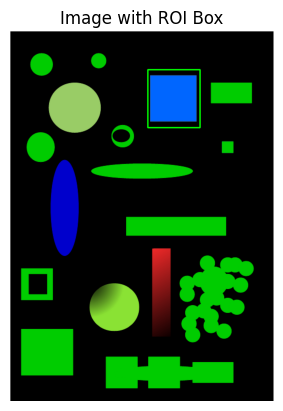

In [7]:
#read in the detect_blob image
image = cv2.imread('detect_blob.png')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()
plt.axis('off')

# drawing a box shape around the blue solid box in the image that is your region of interest
x, y = 282, 79
x2, y2 = 389, 198
w, h = x2 - x, y2 - y

# Draw a rectangle around the ROI
image_with_box = image.copy()
cv2.rectangle(image_with_box, (x, y), (x2, y2), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(image_with_box, cv2.COLOR_BGR2RGB))
plt.title('Image with ROI Box')
plt.show()
plt.axis('off')

#crop your region of interest
roi = image[y:y + h, x:x + w]

#and then rotate it 45 degrees so that it is not clipped
(h_roi, w_roi) = roi.shape[:2]
center = (w_roi // 2, h_roi // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
cos = np.abs(M[0, 0])
sin = np.abs(M[0, 1])
new_w = int((h_roi * sin) + (w_roi * cos))
new_h = int((h_roi * cos) + (w_roi * sin))
M[0, 2] += (new_w / 2) - center[0]
M[1, 2] += (new_h / 2) - center[1]
rotated_roi = cv2.warpAffine(roi, M, (new_w, new_h))

# Display the cropped and rotated ROI
plt.imshow(cv2.cvtColor(rotated_roi, cv2.COLOR_BGR2RGB))
plt.title('Cropped and Rotated ROI')
plt.show()



### Question 7

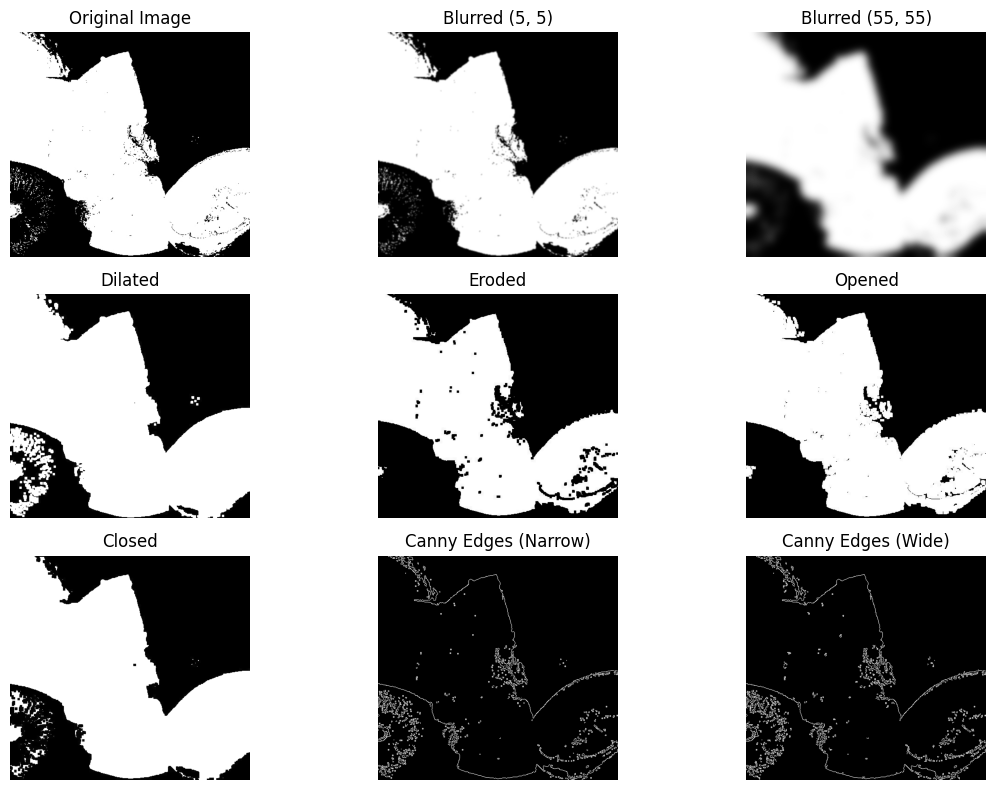

In [8]:
#read in the thresh image, perform thresholding by using gaussian blur with thresholds 5,55
thresh_image = cv2.imread('thresh.jpg', cv2.IMREAD_GRAYSCALE)
blurred_5 = cv2.GaussianBlur(thresh_image, (5, 5), 0)
blurred_55 = cv2.GaussianBlur(thresh_image, (55, 55), 0)
#then perform dilation, erosion, opening & closing using a 5x5 kernel with 1 iteration on the original thresh image (Hint: look into Opencv for operations)
kernel = np.ones((5, 5), np.uint8)

dilated = cv2.dilate(thresh_image, kernel, iterations=1)
eroded = cv2.erode(thresh_image, kernel, iterations=1)
opened = cv2.morphologyEx(thresh_image, cv2.MORPH_OPEN, kernel)
closed = cv2.morphologyEx(thresh_image, cv2.MORPH_CLOSE, kernel)

#Finally apply canny edge detection - experiment using wide and narrow thresholds 
edges_narrow = cv2.Canny(thresh_image, 50, 150)
edges_wide = cv2.Canny(thresh_image, 10, 200)


titles = ['Original Image', 'Blurred (5, 5)', 'Blurred (55, 55)',
          'Dilated', 'Eroded', 'Opened', 'Closed',
          'Canny Edges (Narrow)', 'Canny Edges (Wide)']
images = [thresh_image, blurred_5, blurred_55, dilated, eroded, opened, closed, edges_narrow, edges_wide]

# Display the images using a loop
plt.figure(figsize=(12, 8))
for i in range(len(images)):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


### Question 8

In [9]:
#read in the butterfly image
butterfly_image = cv2.imread('butterfly.jpg')

#open the chess_football image and display it in the notebook. Make sure to correct for the RGB order
football_bgr = cv2.imread('chess_football.png')
football_rgb = cv2.cvtColor(football_bgr, cv2.COLOR_BGR2RGB)

plt.subplot(1, 2, 1)
plt.imshow(football_rgb)
plt.title('Chess Football Image')
plt.axis('off')

#flip the image upside down and display it in the notebook.
flipped_football = cv2.flip(football_rgb, 0)

plt.subplot(1, 2, 2)
plt.imshow(flipped_football)
plt.title('Chess Football Image Flipped Upside down')
plt.axis('off')
plt.tight_layout()
plt.show()

#showing original butterfly image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(butterfly_image, cv2.COLOR_BGR2RGB))
plt.title('Original Butterfly Image')
plt.axis('off')

#draw an empty RED rectangle around the butterfly and display the image in the notebook.
x1, y1 = 10, 20  
x2, y2 = 100, 80
cv2.rectangle(butterfly_image, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Red color in BGR format

#draw a BLUE TRIANGLE in the middle of the image. The size and angle is up to you, but it should be a triangle (three sides) in any orientation.
triangle_points = np.array([[200, 200], [300, 350], [400, 200]], np.int32)
cv2.polylines(butterfly_image, [triangle_points], isClosed=True, color=(255, 0, 0), thickness=1)

#now fill in this triangle
cv2.fillPoly(butterfly_image, [triangle_points], color=(123, 0, 254))


# Modified butterfly image with rectangle and triangle
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(butterfly_image, cv2.COLOR_BGR2RGB))
plt.title('Butterfly Image with Rectangle and Triangle')
plt.axis('off')

plt.tight_layout()
plt.show()

### Question 9

In [10]:
#create a script that opens the picture and allows you to draw empty red circles where ever you click the RIGHT MOUSE BUTTON DOWN

def draw_circle(event, x, y, flags, param):
    global img
    if event == cv2.EVENT_RBUTTONDOWN:
        cv2.circle(img, (x, y), 10, (0, 0, 255), 2)
        cv2.imshow('image', img)

img = cv2.imread('butterfly.jpg')
if img is None:
    print("Error: Could not open or read the image.")
    exit(0)

cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_circle)

while True:
    cv2.imshow('image', img)
    key = cv2.waitKey(1) & 0xFF
    if key == 27:
        break

cv2.destroyAllWindows()



error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1284: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvNamedWindow'


Tries multiple times but couldn't make it work

**Question 10**

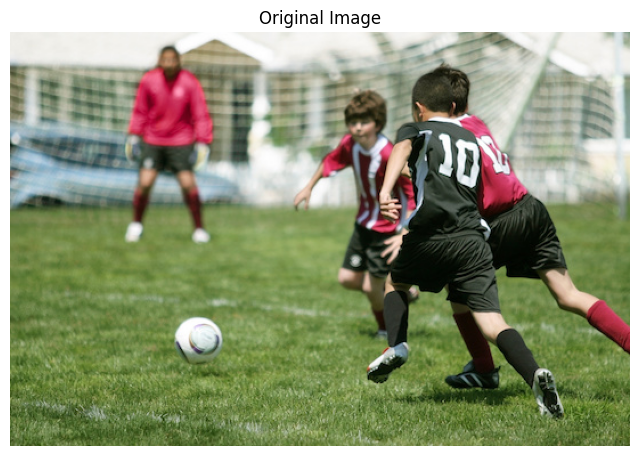

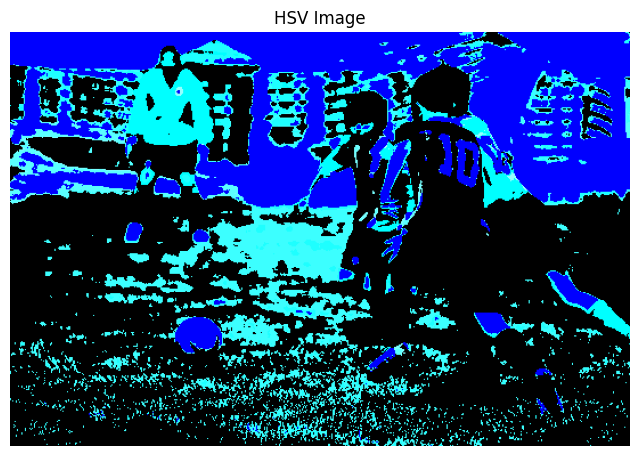

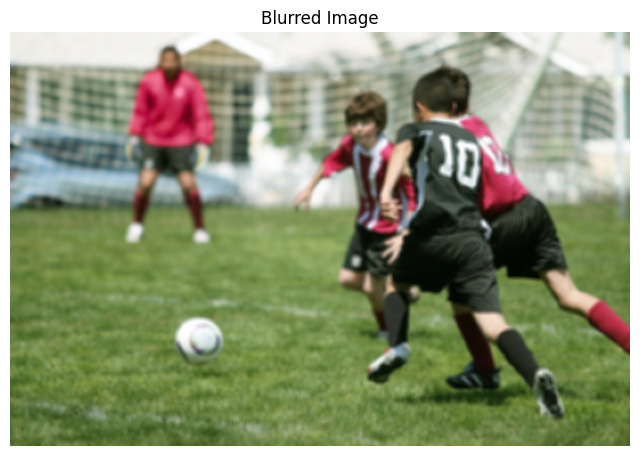

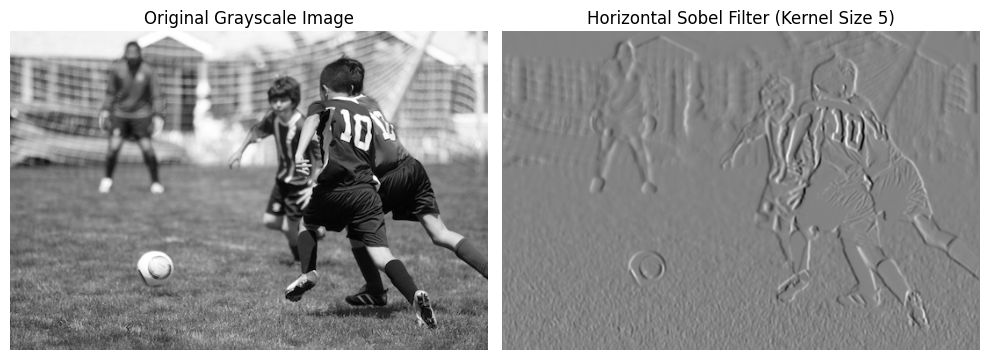

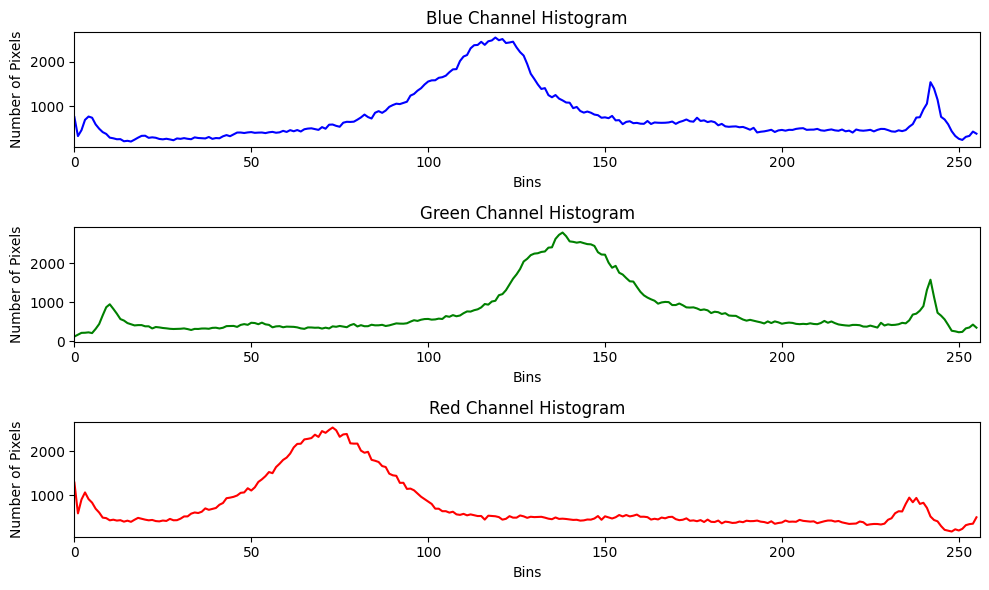

In [30]:
#open and display the any image of your choice
image_path = 'players.jpg'
player_img = cv2.imread(image_path, cv2.IMREAD_COLOR)

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(player_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

#apply a binary threshold onto the image

# Defining a threshold value for each channel (BGR format)
threshold_value = 150

# Applying binary thresholding to each channel
binary_image = player_img.copy()
binary_image[player_img > threshold_value] = 255
binary_image[player_img <= threshold_value] = 0

#convert image colorspace to HSV and display the image
hsv_image = cv2.cvtColor(binary_image, cv2.COLOR_BGR2HSV)
plt.figure(figsize=(8, 6))
plt.imshow(hsv_image)
plt.title('HSV Image')
plt.axis('off')
plt.show()

#create a low pass filter with a 4 by 4 Kernel filled with values of 1/10 (0.01) and then use 2-D Convolution to blur the image (displayed in normal RGB)
kernel_size = 4
low_pass_kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size * kernel_size)

blurred_image = cv2.filter2D(player_img, -1, low_pass_kernel)


plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.title('Blurred Image')
plt.axis('off')
plt.show()

#create a Horizontal Sobel Filter with a kernel size of 5 to the grayscale version of the image and then display the resulting gradient filtered version of the image.

gray = cv2.cvtColor(player_img, cv2.COLOR_BGR2GRAY)

sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobelx, cmap='gray')
plt.title('Horizontal Sobel Filter (Kernel Size 5)')
plt.axis('off')

plt.tight_layout()
plt.show()


#plot the color histograms for the RED, BLUE, and GREEN channel of the image. Pay careful attention to the ordering of the channels

image_rgb = cv2.cvtColor(player_img, cv2.COLOR_BGR2RGB)

blue_channel = image_rgb[:, :, 0]
green_channel = image_rgb[:, :, 1]
red_channel = image_rgb[:, :, 2]

hist_blue = cv2.calcHist([blue_channel], [0], None, [256], [0, 256])
hist_green = cv2.calcHist([green_channel], [0], None, [256], [0, 256])
hist_red = cv2.calcHist([red_channel], [0], None, [256], [0, 256])

# Plot histograms
plt.figure(figsize=(10, 6))

plt.subplot(311)
plt.title('Blue Channel Histogram')
plt.xlabel('Bins')
plt.ylabel('Number of Pixels')
plt.plot(hist_blue, color='blue')
plt.xlim([0, 256])

plt.subplot(312)
plt.title('Green Channel Histogram')
plt.xlabel('Bins')
plt.ylabel('Number of Pixels')
plt.plot(hist_green, color='green')
plt.xlim([0, 256])

plt.subplot(313)
plt.title('Red Channel Histogram')
plt.xlabel('Bins')
plt.ylabel('Number of Pixels')
plt.plot(hist_red, color='red')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()
